Número de ciclos > 16
 Amplitude média > 4.000000332631517
         Periodo > 6.283133333333334
            Emec > [8.00000000e+000 7.99999200e+000 7.99998400e+000 ... 8.00350197e+000
 8.00349809e+000 3.95260422e-318]


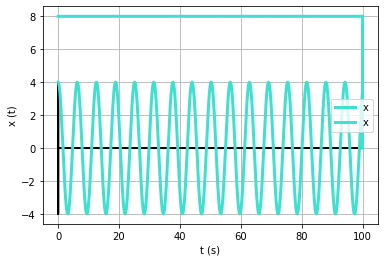

In [26]:
import numpy as np
import matplotlib.pyplot as plt


# Tempo inicial e final
ti = 0
tf = 100

# Massa
m = 1
k = 1

# Posição inicial
xx0 = 4

# Velocidade inicial
vx0 = 0

# Aceleração inicial
ax0 = 0

# dt incremento do tempo e n numero de intervalos
dt = 0.001
n = int((tf - ti) / dt)


# Vetor tempo (n+1 para garantir que nao falta o ultimo dado (Ex: t[10]))
t = np.linspace(ti, tf, n + 1)

# Vetor velocidade (empty e não zeros para não alterar 
# muito o resultado se faltar analisar um dado)
xx = np.empty(n + 1)
vx = np.empty(n + 1)
ax = np.empty(n + 1)

Emec = np.empty(n + 1)

# Soma das amplitudes máximas sao máximas (x[i-1] < x[i] > x[i-1])
amps = 0
# Array de tempos (o seu tamanho é o número de amplitudes máximas encontradas (para fazer a média))
nAmps = []

periodoArray = []

# Introduzir x0 e v0 nos vetores da posição e velocidade
xx[0] = xx0
vx[0] = vx0
ax[0] = ax0

# Preencher os vetores x, v, a
for i in range(n):
    ax[i] = -k * xx[i] / m
    vx[i + 1] = vx[i] + ax[i] * dt
    xx[i + 1] = xx[i] + vx[i+1] * dt
    
    Emec[i] = (0.5 * m * vx[i]**2) + (0.5 * k * xx[i]**2)
    
    # Somar as amplitudes médias encontradas e incrementar o número destas encontradas
    if (xx[i - 1] < xx[i]) and (xx[i] > xx[i + 1]):
        amps += xx[i]
        nAmps.append(t[i])
        
        
for i in range(1, len(nAmps)):
    periodoArray.append(nAmps[i] - nAmps[i-1])
    
Emec[-1] = (0.5 * m * vx[-1]**2) + (0.5 * k * xx[-1]**2)
    
# Periodo = soma dos periodos / numero destes encontradas
periodo = sum(periodoArray) / len(periodoArray)
        
# Amplitude = soma das amplitudes / numero destas encontradas
amplitude = amps / len(nAmps)
    
print("Número de ciclos >", len(nAmps))
print(" Amplitude média >", amplitude)
print("         Periodo >", periodo)
print("            Emec >", Emec)

# Plot
plt.plot(t, xx * 0, linestyle='-', linewidth=2, color="black")
plt.plot(t * 0, xx, linestyle='-', linewidth=2, color="black")
plt.plot(t, xx, label="x",  linestyle='-', linewidth=3, color="turquoise")
plt.plot(t, Emec, label="x",  linestyle='-', linewidth=3, color="turquoise")
plt.xlabel("t (s)")
plt.ylabel("x (t)")
plt.legend()         # Legenda só aparece com isto
plt.grid()

    
    